<a href="https://colab.research.google.com/github/mohammadreza-mohammadi94/Deep-Learning-Projects/blob/main/MNIST%20Digit%20Classifier/MNIST_BoostedLeNet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import tensorflow as tf
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Import Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"X_train Shape: {X_train.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_test Shape: {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train Shape: (60000, 28, 28)
y_train Shape: (60000,)
X_test Shape: (10000, 28, 28)
y_test Shape: (10000,)


## Check a Sample

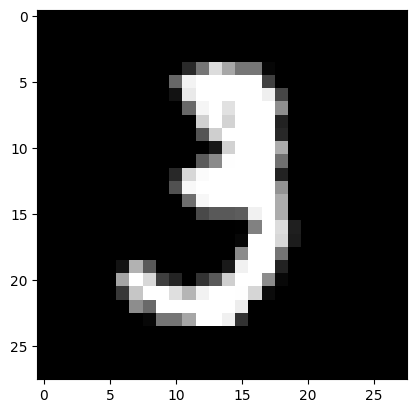

In [3]:
plt.imshow(X_train[10], cmap='gray')
plt.show()

# Preprocessing

In [4]:
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [5]:
print(f"X_train Shape: {X_train.shape}")
print(f"X_test Shape: {X_test.shape}")

X_train Shape: (60000, 28, 28, 1)
X_test Shape: (10000, 28, 28, 1)


# Model Definition
## Boosted LeNet4

### Final Layer-by-Layer Summary:

1. **Input Layer**: `(28, 28, 1)` → Grayscale image.
2. **Conv2D + ReLU (C1)**: `(28, 28, 1)` → `(24, 24, 6)` → Apply Batch Normalization → MaxPooling → `(12, 12, 6)`.
3. **Conv2D + ReLU (C2)**: `(12, 12, 6)` → `(8, 8, 16)` → Apply Batch Normalization → MaxPooling → `(4, 4, 16)`.
4. **Flatten**: `(4, 4, 16)` → `256`.
5. **Dense + ReLU (FC1)**: `256` → `120` → Dropout (0.5).
6. **Dense + ReLU (FC2)**: `120` → `84` → Dropout (0.5).
7. **Output (Softmax)**: `84` → `10`.

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the Boosted LeNet-4 Architecture
def boosted_lenet4(input_shape=(28, 28, 1), num_classes=10):
    model = models.Sequential()

    # First Convolutional Layer (C1)
    model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())  # Added Batch Normalization
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Second Convolutional Layer (C2)
    model.add(layers.Conv2D(16, (5, 5), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # Fully Connected Layer (C3)
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dropout(0.5))  # Added Dropout for regularization

    # Fully Connected Layer (C4)
    model.add(layers.Dense(84, activation='relu'))
    model.add(layers.Dropout(0.5))  # Added Dropout

    # Output Layer (Softmax for classification)
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

In [8]:
model = boosted_lenet4()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 24, 24, 6)           │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8, 8, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 84)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,514 (173.88 KB)

 Trainable params: 44,470 (173.71 KB)

 Non-trainable params: 44 (176.00 B)

In [12]:
# We will be allowing 10 itterations to happen
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(X_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 77ms/step - accuracy: 0.5851 - loss: 1.3068 - val_accuracy: 0.9551 - val_loss: 0.1520
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 68ms/step - accuracy: 0.9437 - loss: 0.2033 - val_accuracy: 0.9796 - val_loss: 0.0689
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.9643 - loss: 0.1322 - val_accuracy: 0.9819 - val_loss: 0.0624
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - accuracy: 0.9718 - loss: 0.1062 - val_accuracy: 0.9868 - val_loss: 0.0479
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 67ms/step - accuracy: 0.9776 - loss: 0.0868 - val_accuracy: 0.9867 - val_loss: 0.0495
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.9805 - loss: 0.0796 - val_accuracy: 0.9878 - val_loss: 0.0468
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 68ms/step - accuracy: 0.9810 - loss: 0.0708 - val_accuracy: 0.9880 - val_loss: 0.0430
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 73ms/step - accuracy: 0.9826 - loss: 0.0635 - 

# Boosted LeNet4 Performance

In [13]:
# Check Accuracy of the Model
loss ,acc= model.evaluate(X_test, y_test)
print('Accuracy : ', acc)
print('Loss: ', loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9871 - loss: 0.0451
Accuracy :  0.9891999959945679
Loss:  0.03947381675243378


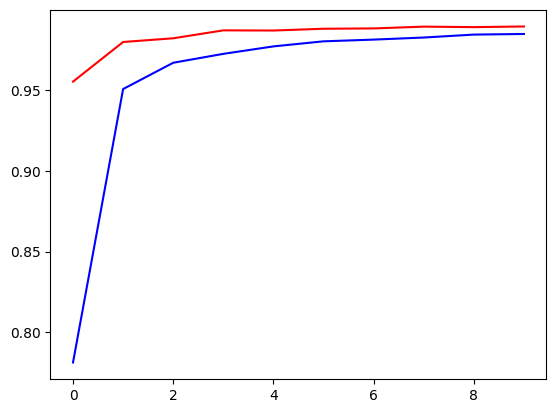

In [14]:
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history.history['val_accuracy'], color='red')

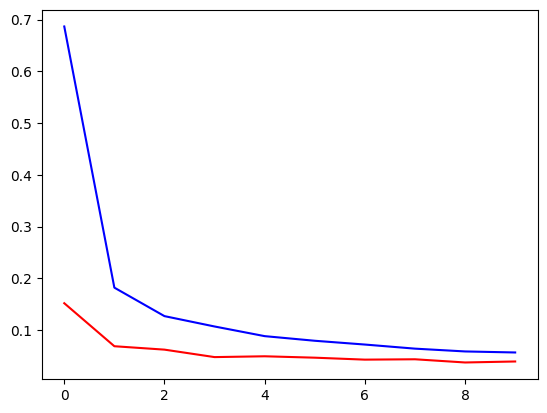

In [15]:
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='red')